## Folytonosság szemléltetése

Először is húzzuk be a múltkori deriválós kódot és a Newton-Raphson implementációt.

In [1]:
%pylab inline

class Expr:
    def __init__(self,lhs,rhs,op):
        self.lhs,self.rhs,self.op = lhs,rhs,op
        
    def __add__(self,rhs):
        if type(rhs) == Expr:
            return Expr(self,rhs,'+')
        else:
            return Expr(self,rhs,'+n')
    
    def __radd__(self,lhs):
        return Expr(self,lhs,'+n')
    
    def __sub__(self,rhs):
        if type(rhs) == Expr:
            return self+rhs*(-1)
        else:
            return self+(-rhs)
        
    def __rsub__(self,lhs):
        return lhs+self*(-1)
    
    def __neg__(self):
        return (-1)*self
    
    def __mul__(self,rhs):
        if type(rhs) == Expr:
            return Expr(self,rhs,'*')
        else:
            return Expr(self,rhs,'*n')
    
    def __rmul__(self,lhs):
        return Expr(self,lhs,'*n')
    
    def __truediv__(self,rhs):
        if type(rhs) == Expr:
            return self*rhs**(-1)
        else:
            return self*(1/rhs)
        
    def __rtruediv__(self,lhs):
        return self**(-1)*lhs
    
    def __pow__(self,rhs):
        if type(rhs) == Expr:
            return Expr(self,rhs,'**')
        else:
            return Expr(self,rhs,'**n')
        
    def __rpow__(self,lhs):
        return Expr(lhs,self,'n**')
    
    def __call__(self,x0):
        if self.op == '+':
            return self.lhs(x0) + self.rhs(x0)
        elif self.op == '+n':
            return self.lhs(x0) + self.rhs
        elif self.op == '*':
            return self.lhs(x0) * self.rhs(x0)
        elif self.op == '*n':
            return self.lhs(x0) * self.rhs
        elif self.op == '**':
            return self.lhs(x0)**self.rhs(x0)
        elif self.op == '**n':
            return self.lhs(x0)**self.rhs
        elif self.op == 'n**':
            return self.lhs**self.rhs(x0)
        elif self.op == 'sin':
            return sin(self.lhs(x0))
        elif self.op == 'cos':
            return cos(self.lhs(x0))
        elif self.op == 'log':
            return log(self.lhs(x0))
        elif self.op == 'exp':
            return exp(self.lhs(x0))
        elif self.op == 'id':
            return x0
        elif self.op == 'const':
            return self.lhs
        else:
            raise NotImplementedError
        
    def diff(self):
        if self.op == '+':
            return self.lhs.diff() + self.rhs.diff()
        elif self.op == '+n':
            return self.lhs.diff()
        elif self.op == '*':
            return self.lhs.diff()*self.rhs + self.lhs*self.rhs.diff()
        elif self.op == '*n':
            return self.lhs.diff()*self.rhs
        elif self.op == '**':
            return self.lhs**self.rhs * (self.rhs.diff()*Log(self.lhs) + self.rhs*self.lhs.diff()/self.lhs)
        elif self.op == '**n':
            return self.rhs*self.lhs**(self.rhs-1)*self.lhs.diff()
        elif self.op == 'n**':
            return self.lhs**self.rhs*log(self.lhs)*self.rhs.diff()
        elif self.op == 'sin':
            return Cos(self.lhs)*self.lhs.diff()
        elif self.op == 'cos':
            return -Sin(self.lhs)*self.lhs.diff()
        elif self.op == 'log':
            return self.lhs.diff()/self.lhs
        elif self.op == 'exp':
            return Exp(self.lhs)*self.lhs.diff()
        elif self.op == 'id':
            return Expr(1,None,'const')
        elif self.op == 'const':
            return Expr(0,None,'const')
        else:
            raise NotImplementedError
    
def Sin(x):
    return Expr(x,None,'sin')
def Cos(x):
    return Expr(x,None,'cos')
def Log(x):
    return Expr(x,None,'log')
def Exp(x):
    return Expr(x,None,'exp')
def Sqrt(x):
    return x**0.5
x = Expr(None,None,'id')

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Newton-Raphson
def NR(f,x0):
    df  = f.diff()
    fx0 = f(x0)
    while abs(fx0)>1e-6:
        x0  -= fx0/df(x0)
        fx0  = f(x0)
    return x0

## Folytonosság

Egy $f: D_f\rightarrow \mathbb{R}$ függvény folytonos az $x_0$ pontban, ha minden $\varepsilon > 0$-hoz létezik $\delta>0$ úgy, hogy ha

\begin{align}
\left|x-x_0 \right| < \delta \quad \text{akkor} \quad \left| f(x) - f(x_0) \right| < \varepsilon .
\end{align}

Ez kb. azt jelenti, hogy az $x_0$ pontban nem lehet szakadása vagy ugrása a függvénynek. Például az abszolútértékfüggvény minden pontban folytonos (röviden: folytonos), de az $1/x$ függvény nem, mert a $0$-ban szakadása van.

<b>Feladat.</b> Keressük azt a (legnagyobb) $\delta$ számot, amelyre

\begin{align}
\left|x-1 \right| < \delta \quad \text{esetén} \quad \left| x^2 - 1 \right| < \frac{1}{2} .
\end{align}

Itt a folytonosságra megy ki a játék a következő szereposztással:

- $f(x) = x^2$
- $x_0 = 1$, azaz $f(x_0) = 1$
- $\varepsilon = \frac{1}{2}$

Mivel a négyzetfüggvény folytonos, kell tudnunk olyan $\delta$-t mondani, ami teljesíti a feltételeket.

<b>Megoldás.</b> Egyszerű: meg kell keresnünk, hogy az $y$ tengelyen az $f(x_0) \pm \varepsilon$ értékekhez milyen értékek tartoznak az $x$ tengelyen. Ha ez megvan, ezek közül az $x_0$-hoz "közelebbit" kell kiválasztanunk (nézzétek lent a megoldást). Analitikus megoldás:

\begin{align}
0 = x_1^2-\frac{1}{2} &,\qquad 0 = x_2^2-\frac{3}{2}\\
x_{1,2} &= \sqrt\frac{1}{2}, \sqrt\frac{3}{2}
\end{align}

Innen
\begin{align}
\delta = \min \left(\left|1-\sqrt\frac{1}{2}\right|,\left|1-\sqrt\frac{3}{2}\right|\right) \approx 0.225
\end{align}

Általánosabban az értékek megkereséséhez használhatjuk a korábban tanult Newton-Raphson algoritmust: a függvényt "letoljuk" $f(x_0) \pm \varepsilon$-nal, megkeressük a zérushelyeket, majd megnézzük, hogy melyik esik közelebb $x_0$-hoz. Ennek a távolsága jó lesz $\delta$-nak.

In [3]:
# Szereposztás, lehet vele játszani
f = x**2
x0  = 1
eps = 1/2

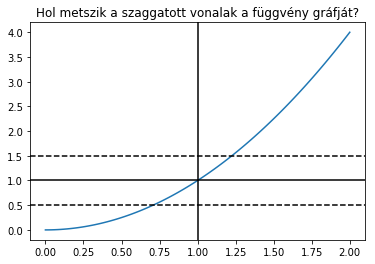

In [4]:
lsp = np.linspace(0,2,100)
plot(lsp,f(lsp))

axhline(f(x0),     ls='-',c='black')
axhline(f(x0)+eps, ls='--',c='black')
axhline(f(x0)-eps, ls='--',c='black')

axvline(x0,ls='-',c='black')
title("Hol metszik a szaggatott vonalak a függvény gráfját?");

In [5]:
# Megkeressük a zérushelyeket
d1,d2 = NR(f-(f(x0)-eps),x0), NR(f-(f(x0)+eps),x0)

# Vesszük a közelebbinek a távolságát x0-tól
delta = min(abs(x0-d1),abs(x0-d2))

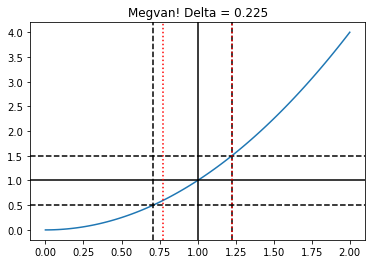

In [6]:
plot(lsp,f(lsp));

axhline(f(x0),     ls='-', c='black')
axhline(f(x0)+eps, ls='--',c='black')
axhline(f(x0)-eps, ls='--',c='black')

axvline(x0,ls='-', c='black')
axvline(d1,ls='--',c='black')
axvline(d2,ls='--',c='black')
axvline(x0+delta,ls=':',c='red')
axvline(x0-delta,ls=':',c='red')
title("Megvan! Delta = {:.3f}".format(delta));